## Final Project Submission

Please fill out:
* Student name: Harrison Gu and Justin Hue
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Yish Lim

Business question: We are running a construction company and would like to determine how to build houses that sell at a higher price.


Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

Investigate the data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Check to see if any houses appear more than once. If so, remove duplicates.

In [4]:
df[df.duplicated(subset='id', keep=False)==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [5]:
df.drop_duplicates(subset='id', keep='first', inplace=True, ignore_index=True)

In [6]:
df[df.duplicated(subset='id', keep='first')==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Drop unnecessary columns. Features that are time related ('date', 'yr_renovated', etc) are not useful to us because we can only build homes starting from tomorrow. Likewise, 'condition' and 'grade' will also be removed because we are only building new homes, and will do so at the highest quality that we can. We removed 'lat', and 'long' because these tell similar information to 'zipcode'.

In [7]:
df.drop(columns=['id','date','condition','grade','yr_built','yr_renovated', 'lat', 'long'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21420 non-null  float64
 1   bedrooms       21420 non-null  int64  
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  int64  
 4   sqft_lot       21420 non-null  int64  
 5   floors         21420 non-null  float64
 6   waterfront     19067 non-null  float64
 7   view           21357 non-null  float64
 8   sqft_above     21420 non-null  int64  
 9   sqft_basement  21420 non-null  object 
 10  zipcode        21420 non-null  int64  
 11  sqft_living15  21420 non-null  int64  
 12  sqft_lot15     21420 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


Couldn't find a way to replace the null entries in 'view' and 'waterfront' columns since they are binary and there is no way of knowing what should be there. We will drop those rows, as it still leaves us ~90% of the data to work with.

In [9]:
df.dropna(subset=['view'], inplace=True)

In [10]:
df.dropna(subset=['waterfront'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21419
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19010 non-null  float64
 1   bedrooms       19010 non-null  int64  
 2   bathrooms      19010 non-null  float64
 3   sqft_living    19010 non-null  int64  
 4   sqft_lot       19010 non-null  int64  
 5   floors         19010 non-null  float64
 6   waterfront     19010 non-null  float64
 7   view           19010 non-null  float64
 8   sqft_above     19010 non-null  int64  
 9   sqft_basement  19010 non-null  object 
 10  zipcode        19010 non-null  int64  
 11  sqft_living15  19010 non-null  int64  
 12  sqft_lot15     19010 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.0+ MB


Investigate 'sqft_basement column' because it should be a float but is currently an object.

In [11]:
df['sqft_basement'].value_counts()

0.0       11282
?           413
600.0       189
500.0       185
700.0       184
          ...  
1990.0        1
1880.0        1
1810.0        1
374.0         1
768.0         1
Name: sqft_basement, Length: 297, dtype: int64

Looks like there are some rows with '?' as entries. We will change these to '0.0' for now so we can convert the column to float.

In [12]:
df.loc[df['sqft_basement']=='?', ['sqft_basement']] = '0.0'
df['sqft_basement'].value_counts()

0.0       11695
600.0       189
500.0       185
700.0       184
800.0       171
          ...  
2330.0        1
1525.0        1
1880.0        1
1135.0        1
516.0         1
Name: sqft_basement, Length: 296, dtype: int64

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21419
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19010 non-null  float64
 1   bedrooms       19010 non-null  int64  
 2   bathrooms      19010 non-null  float64
 3   sqft_living    19010 non-null  int64  
 4   sqft_lot       19010 non-null  int64  
 5   floors         19010 non-null  float64
 6   waterfront     19010 non-null  float64
 7   view           19010 non-null  float64
 8   sqft_above     19010 non-null  int64  
 9   sqft_basement  19010 non-null  float64
 10  zipcode        19010 non-null  int64  
 11  sqft_living15  19010 non-null  int64  
 12  sqft_lot15     19010 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.0 MB


We noticed that sqft_living = sqft_above + sqft_basement. Because these columns are correlated, we will get rid of 'sqft_above' and 'sqft_basement'. Instead, we will have a binary column 'basement' to show whether or not the house has a basement.

In [15]:
df['sqft_living'].value_counts()

1300    124
1440    121
1400    117
1820    117
1660    113
       ... 
7220      1
1095      1
3206      1
1159      1
2031      1
Name: sqft_living, Length: 991, dtype: int64

In [16]:
df['sqft_above'].value_counts()

1300    192
1010    179
1200    171
1060    166
1220    164
       ... 
3266      1
3362      1
1347      1
809       1
2031      1
Name: sqft_above, Length: 903, dtype: int64

In [17]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [18]:
df['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,basement
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,400,98125,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,770,0,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,910,98136,1360,5000,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,0,98074,1800,7503,0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3890,1530,98053,4760,101930,1


In [19]:
df.drop(columns=['sqft_basement', 'sqft_above'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19010 non-null  float64
 1   bedrooms       19010 non-null  int64  
 2   bathrooms      19010 non-null  float64
 3   sqft_living    19010 non-null  int64  
 4   sqft_lot       19010 non-null  int64  
 5   floors         19010 non-null  float64
 6   waterfront     19010 non-null  float64
 7   view           19010 non-null  float64
 8   zipcode        19010 non-null  int64  
 9   sqft_living15  19010 non-null  int64  
 10  sqft_lot15     19010 non-null  int64  
 11  basement       19010 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 1.8 MB


Function to run all KFold tests and OLS models moving forward.

In [20]:
def run_model(x, y, data):
    linreg = LinearRegression()
    crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 1)
    mean_r2 = np.mean(cross_val_score(linreg, x, y, scoring='r2', cv=crossvalidation))
    
    x_cols = data.drop('price', axis=1).columns
    y_col = 'price'
    plus = '+'.join(x_cols)
    formula = y_col + '~' + plus
    model = ols(formula=formula, data=data).fit()
    print('The mean cross val score for a KFold test with 10 splits is {} \n'.format(mean_r2))
    print(model.summary())

Run baseline model with just scrubbed data. No improvements made yet.

In [21]:
x = df.drop(['price'], axis=1)
y = df['price']
run_model(x, y, df)

The mean cross val score for a KFold test with 10 splits is 0.5689767766179151 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2333.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:55:54   Log-Likelihood:            -2.6266e+05
No. Observations:               19010   AIC:                         5.253e+05
Df Residuals:                   18998   BIC:                         5.254e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

After running the baseline OLS model, we get an r^2 of 0.575, which implies that ~57.5% of the data is explained by our model. This is similar to the mean r^2 from running a 10 split KFold test, which tells us that our data is consistent throughout (training model fits to testing data). We also notice that the p value for 'bathrooms' and 'sqft_lot' are not significant, which could be caused by high correlation with other variables.

Other noteables:
Skew of 2.61 and kurtosis of 28.311 leads us to believe that there are too many outliers in this dataset. We will work to remove them.

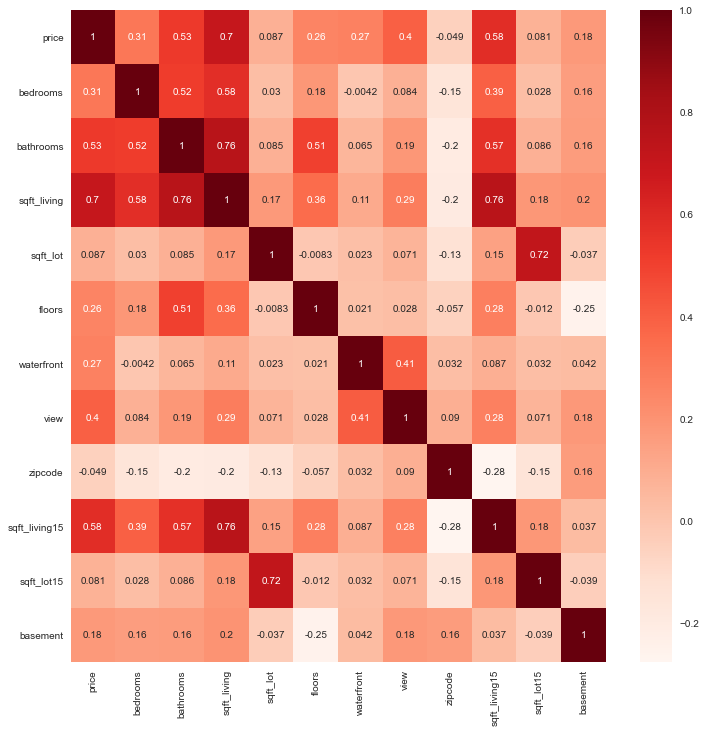

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap='Reds', annot=True, ax=ax);

Heat map shows that 'sqft_living' is highly correlated with 'sqft_living15'. The correlation is barely above the 0.75 threshold, so we will leave those features in for now.

Remove outliers from the dataset. We used 3 standard deviations away from the mean to define outlier.

In [23]:
df_no_outlier = df.copy()
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
for col in continuous:
    mu = np.mean(df[col])
    std = np.std(df[col])
    outlier = 3*std
    df_no_outlier = df_no_outlier[(df_no_outlier[col] <= mu+outlier) & (df_no_outlier[col] >= mu-outlier)]
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18064 entries, 1 to 21419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18064 non-null  float64
 1   bedrooms       18064 non-null  int64  
 2   bathrooms      18064 non-null  float64
 3   sqft_living    18064 non-null  int64  
 4   sqft_lot       18064 non-null  int64  
 5   floors         18064 non-null  float64
 6   waterfront     18064 non-null  float64
 7   view           18064 non-null  float64
 8   zipcode        18064 non-null  int64  
 9   sqft_living15  18064 non-null  int64  
 10  sqft_lot15     18064 non-null  int64  
 11  basement       18064 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 1.7 MB


In [24]:
x1 = df_no_outlier.drop(['price'], axis=1)
y1 = df_no_outlier['price']
run_model(x1, y1, df_no_outlier)

The mean cross val score for a KFold test with 10 splits is 0.4871214918203541 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1571.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:56:00   Log-Likelihood:            -2.4435e+05
No. Observations:               18064   AIC:                         4.887e+05
Df Residuals:                   18052   BIC:                         4.888e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

After removing outliers, the r^2 went down by 15%. However, skew is now .993, and kurtosis is down to 5.583. Both are still considered high, but are huge improvements compared to the baseline. We will consider this an improvement. 

The p values for 'bathrooms', and 'sqft_lot' are still insignificant.

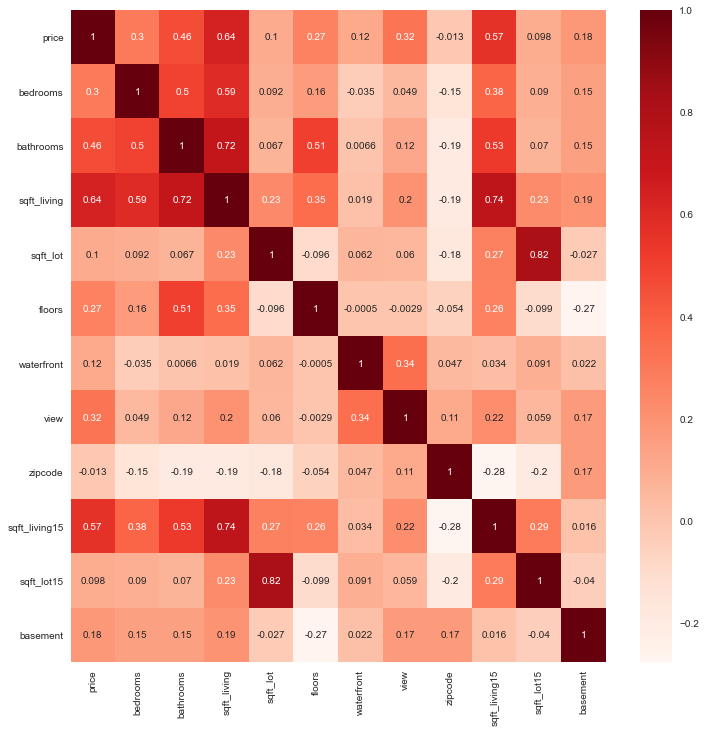

In [25]:
corr = df_no_outlier.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap='Reds', annot=True, ax=ax);

High correlations between 'sqft_living' and 'sqft_living15' have been removed, but now we see high correlation between 'sqft_lot15' and 'sqft_lot'.

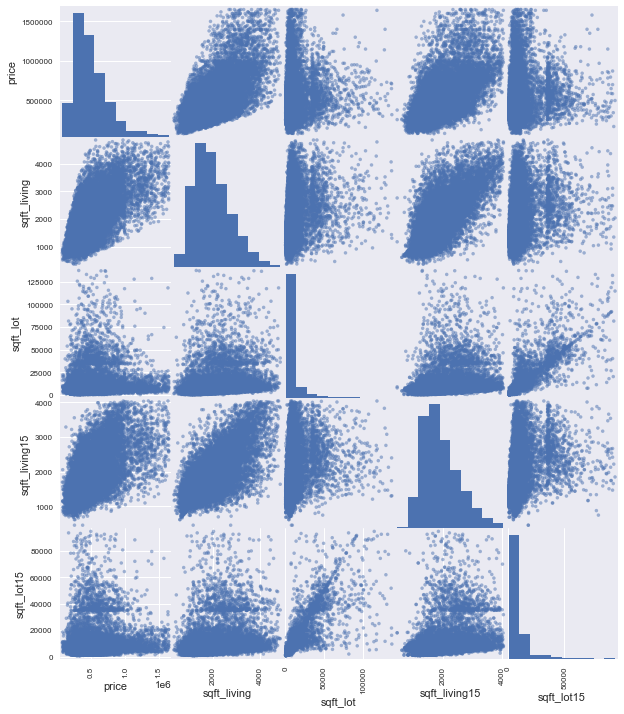

In [26]:
pd.plotting.scatter_matrix(df_no_outlier[continuous], figsize=(10, 12));

It looks like none of the continuous variables are normally distributed. We will now log transform these features to improve normality.

In [27]:
df_log = df_no_outlier.copy()

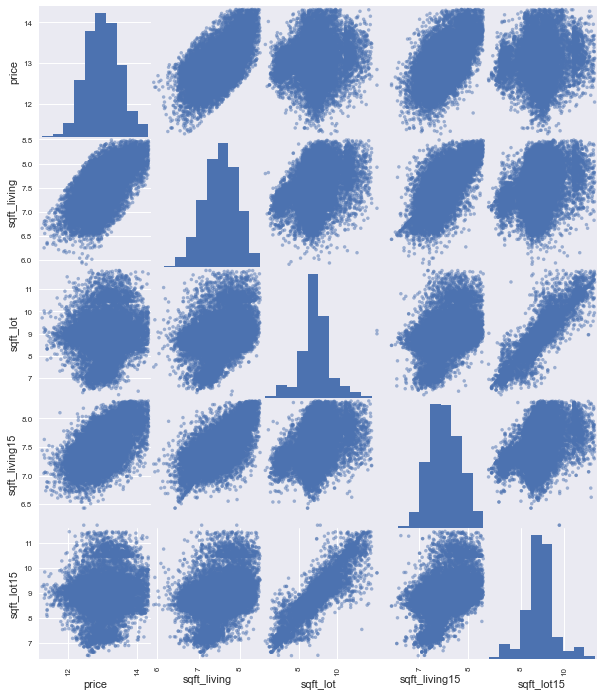

In [28]:
for feat in continuous:
    df_log[feat] = df_log[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_log[continuous], figsize=(10, 12));

In [29]:
x2 = df_log.drop(['price'], axis=1)
y2 = df_log['price']

run_model(x2, y2, df_log)

The mean cross val score for a KFold test with 10 splits is 0.4796137417570409 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1522.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:56:06   Log-Likelihood:                -6387.8
No. Observations:               18064   AIC:                         1.280e+04
Df Residuals:                   18052   BIC:                         1.289e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

Skew and kurtosis are now also in acceptable ranges. 'Bathrooms' still has an insignificant p value.

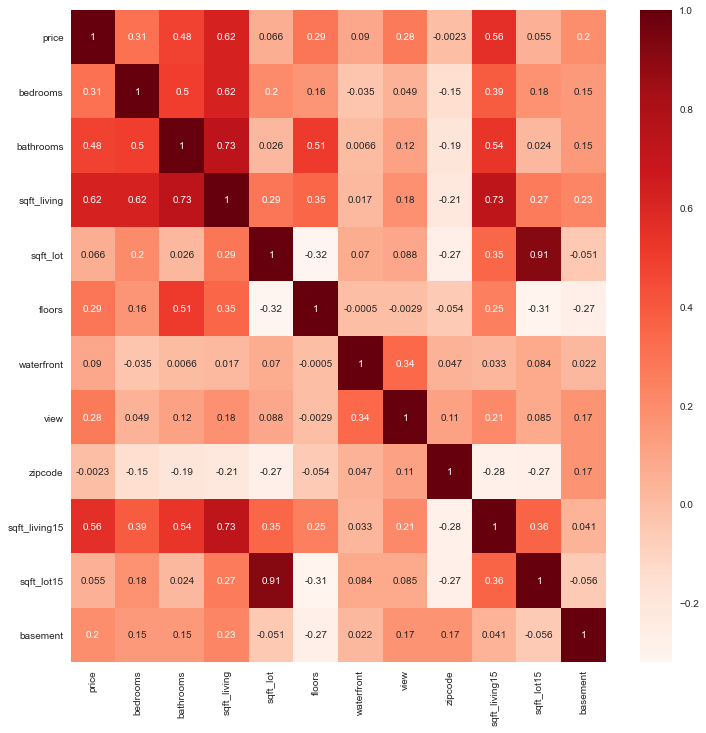

In [30]:
corr = df_log.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap='Reds', annot=True, ax=ax);

Correlation between 'sqft_lot15' and 'sqft_lot' is now even higher. We will try min-max scaling all the features. If this does not fix the issue, we will have to remove one of the features.

In [31]:
df_scale = df_log.copy()

In [34]:
zipcode = pd.get_dummies(df_scale['zipcode'], prefix='zipcode', drop_first=True)

In [35]:
no_zip = df_scale.drop(['zipcode'], axis=1)

In [36]:
for feat in no_zip.columns:
    minimum = no_zip[feat].min()
    maximum = no_zip[feat].max()
    no_zip[feat] = no_zip[feat].map(lambda x: (x-minimum)/(maximum-minimum))
    

In [37]:
preprocessed = pd.concat([no_zip, zipcode], axis=1)

In [38]:
x3 = preprocessed.drop('price', axis=1)
y3 = preprocessed['price']

run_model(x3, y3, preprocessed)

The mean cross val score for a KFold test with 10 splits is 0.8467380748757016 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1274.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:58:08   Log-Likelihood:                 24880.
No. Observations:               18064   AIC:                        -4.960e+04
Df Residuals:                   17984   BIC:                        -4.898e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

After one hot encoding, and min-max scaling, the r^2 drastically improved, increasing by 78% from our previous model, and 48% from our baseline model. Skew is still acceptable, but kurtosis has become a bit higher.

Still no improvements in p values. Will remove one at a time to see effects.

In [40]:
df_no_lot15 = preprocessed.copy()

In [41]:
df_no_lot15.drop('sqft_lot15', axis=1, inplace=True)

In [42]:
x4 = df_no_lot15.drop('price', axis=1)
y4 = df_no_lot15['price']

run_model(x4, y4, df_no_lot15)

The mean cross val score for a KFold test with 10 splits is 0.8467551407545535 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1290.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:17:33   Log-Likelihood:                 24880.
No. Observations:               18064   AIC:                        -4.960e+04
Df Residuals:                   17985   BIC:                        -4.898e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

Removing 'sqft_lot15' slightly improved the p value of 'floors'. Although this is slightly higher than our accepted significance level, we will still keep it in our model.